# Chaines de Markov et épidémiologie :
## propagation d’une épidémie dans une population

### Packages :

In [1]:
# Les packages random et matplotlib sont conseillés.
import numpy as np
import matplotlib.pyplot as plt
import random
from copy import copy, deepcopy
from collections import Counter

## 1 Description du modèle

#### 1. Créez la matrice de transition A, la matrice contenant les probabilités de transition entre les différents états. Vérifiez que cette matrice est stochastique

In [2]:
# A la matrice de transition 
# P(2,2) = 1 ; P(0,1) = 0.08 ; P(0,0) = 0.92 ; P(1,1) = 0.93 ; P(1,2) = 0.07 ; P(0,2) = P(1,0) = P(2,0) = P(2,1) = 0
# Avec: P -> la proba ; 0 -> l'etat S ; 1 -> l'etat I ; 2 -> l'etat R
A = np.array([[0.92,0.08,0],[0,0.93,0.07],[0,0,1]])
print(A)


[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.   0.   1.  ]]


C'est une matrice carrée (1)

0.92 + 0.08 + 0 = 0 + 0.93 + 0.07 = 0 + 0 + 1 = 1 

Alors la somme de chaque ligne vaut 1 (2) 

Donc  d'après (1) et (2) cette matrice est stochastique

#### 2. Créez Π0 la distribution de probabilité initiale.

In [5]:
P_s = 0.9 # Un individu a une probabilité de 0.9 d’être sain
P_i = 0.1 # 0.1 d’être infecté
P_r = 0 # Alors une probabilité de 0 qu'il soit guéri
pi0 = [P_s, P_i, P_r] # Distribution de la probabilité initale
print(pi0)

[0.9, 0.1, 0]


### Tirage aléatoire des états

In [6]:
def picker(p, list_AZ,list_SZ):
    
    
    repetitions = Counter(list_SZ) #un dictionnaire où nous mettons les valeurs de la liste avec leurs repetitions 
    # Exemple : [0.5 0.5 0] -> {0.5 : 2 , 0 : 1}
    # Nous applicons ca sur la liste sans les zeros pour des raisons de facilité de calcul et d'optimisation

    minimum = min(list_SZ) # Le minimum de la liste sans les zeros 
                            # afin que nous prenons pas les 0 mais la valeur qui est juste supérieur 
    
    
    list_min = [cpt for cpt, n in enumerate(list_AZ) if n == minimum] # Nous mettons toutes ses positions dans une liste 

    if (p > 0) and (p <= (minimum * 100)) : # Exemple [0.91 0.08 0.01] P devra etre entre 0 et 0.01*100=10%
        if repetitions[minimum] > 1 : # Si la valeur existe plus qu'une fois dans la liste
            index = list_min[0] # Nous prenons la premiere position vu que c'est la premiere fois que nous voyons la valeur
        else :    
            index = list_AZ.index(minimum) # Sinon nous prenons directement l'indice de la valeur vu que la fonction index
                                            # prend que la premiere position de la valeur dans la liste
        return index 
        
    list_SZ.remove(minimum) # Il faut enlever la valeur de la liste sans les 0
    minimum2 = min(list_SZ) # pour trouver le nouveau minimum
    
    
    list_min2 = [cpt for cpt, n in enumerate(list_AZ) if n == minimum2]
    
    if (p > minimum) and (p <= (minimum * 100 + minimum2 * 100)) :
        if repetitions[minimum2] > 1 : 
            if list_min2 == list_min : 
                index = list_min[1] # maintenant si nous voyons la valeur pour la deuxieme fois nous prenons 
                                    # sa deuxième position
            # Et ainsi de suite pour le reste du code de cette fonction, le reste suit le meme logique .
            else :
                index = list_min2[0]   
        else :
            index = list_AZ.index(minimum2)
        return index
        
    list_SZ.remove(minimum2)
    reste = list_SZ[0]
    
    list_reste = [cpt for cpt, n in enumerate(list_AZ) if n == reste]
    
    if (p > (minimum * 100 + minimum2 * 100)) and (p <= 100) :
        if repetitions[reste] > 1 : 
            if list_reste == list_min2 :
                if  list_min2 != list_min : 
                    index = list_min2[1]
                else :
                    index = list_min2[2]
            elif liste_reste == liste_min :
                if liste_min != liste_min2 :
                    index = liste_min[1]
                else :
                    index = liste_min[2]
        else :
            index = list_AZ.index(reste)
    
    return index

In [7]:
def initialStatePicker(p, dist_proba_init):
    """
    Fonction implémenter pour l'utilisation en generateRandomSequence, 
    elle trouve l'état initial choisi a travers de la probabilité aléatoire et la distribution initiale des probabilités.
    
    *les parametres
     p : la probabilité aléatoire ; int.
     dist_proba_init : la distribition de la probablité initiale; tab[float] .
     
    *le return : 
     Retourne la valeur clé de l'état.
    
    """
    
    # Nous choisissons un état initial aléatoire en tenant compte de la distribution de la probabilité initiale [0.9, 0.1, 0]
    # c'est a dire l'etat initial peut etre soit un S avec une proba de 90% soit un I avec une proba de 10% 
    # si nous trouvons 0 c'est a dire R avec une proba nul nous recherchons du nouveau un nouveau 
    # état initial qui est différent de R .
    
    
    list_SZ = [s for s in dist_proba_init if s != 0]
    
    i = picker(p, dist_proba_init, list_SZ)
    return i

In [8]:
def nextStatePicker(pre, p, matrice_transition):
    """
    Fonction implémenter pour l'utilisation en GenerateRandomSequence,
    elle trouve l'etat suivant a partir de : l'etat precedent, la probabilité aléatoire et la matrice des transitions.
    
    *les parametres:
     pre : l'etat precedent ; int .
     p : la probabilité aléatoire ; int.
     matrice_transition : la matrice contenant les probabilités de transition entre les différents états; tab[float][float] .
     
     *le return:
      Retourne la valeur clé de l'etat suivant.
      
    """
    
    #precendent -> transition proba / reboucle -> etat suivant


    matrix = deepcopy(matrice_transition) # copie temporaire
    list_AZ = [s for s in matrix[pre]] #nous prenons la liste avec l'indice du precedent 
    list_SZ = [s for s in matrix[pre] if s != 0] # la liste de la matrice avec l'indice du precedent sans les 0 .
    i = picker(p, list_AZ, list_SZ)
    return i

In [9]:
def generateRandomSequence(T, dist_proba_init, matrice_transition):
    """
    génére une séquence aléatoire de taille T en utilisant cette chaîne de Markov.
    
    *les parametres:
     T : la longeur de la chaine générer; int .
     dist_proba_init : la distribition de la probablité initiale; tab[float] .
     matrice_transition : la matrice contenant les probabilités de transition entre les différents états; tab[float][float] .
     
    *le return :
     Retourne une sequence genere aleatoirement de taille T; str .
    
    """
    
    #SIR : dict[int:str] 
    SIR = {0 : "S", 1 : "I", 2 : "R"} 
    
    #random_sequence : str  
    random_sequence = "" # Initalisation de la sequence vide, nous allons concatener dedans la sequence a retourner .
    
    # Nous choisissons un état initial aléatoire en tenant compte de la distribution de la probabilité initiale [0.9, 0.1, 0]
    # c'est a dire l'etat initial peut etre soit un S avec une proba de 90% soit un I avec une proba de 10% 
    # si nous trouvons 0 c'est a dire R avec une proba nul nous recherchons du nouveau un nouveau 
    # état initial qui est différent de R .
    proba = np.random.randint(0,100)
    while proba == 0 : # 0%
        proba = np.random.randint(0,100)
    i = initialStatePicker(proba,dist_proba_init)
    
    # Nous insérons le nom de l'etat initial trouvé dans le dictionnaire DIR a partin de sa clé dans
    # le début de la séquence aléatoire. Et nous stockons cet clé dans une variable "precedent" pour pouvoir l'accéder après .
    random_sequence = random_sequence + SIR.get(i) 
    precedent = i # Après, "precedent" devient figurativement le état_i-1 (état precedent) . 
    
    
    
    
    # La boucle dans laquelle nous trouvons les états aléatoirement en tenant compte des probabilités
    # de la matrice des transitions .
    for j in range(1,T):
        # Quand l'indice [precedent,i] = 0 sa probabilité dans la matrice des transitions et nulle
        # c'est a dire la probabilité de i sachant precedent vaut 0, donc la transition qui relie les deux états precedent et i 
        # est inexistante, ce qui nous ramène a rechercher alèatoirement de nouveau un autre état.
        proba = np.random.randint(0,100)
        while (proba == 0) : 
            proba = np.random.randint(0,100)
        
        i = nextStatePicker(precedent,proba,matrice_transition)
   
        precedent = i 
        random_sequence = random_sequence + SIR.get(i) #concatenation des états avec les états precedents .
        
    return random_sequence

# T = 50
print(generateRandomSequence(50, pi0, A))


SSSIIIIIIRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR


### Modélisation d’une population

#### 1. A chaque temps t, comptez le nombre d’individus sains, infectés et guéris dans la population et affichez l’évolution du nombre d’individus dans les trois états en fonction du temps

In [10]:
def GenerateRandomPS(population, t, dist_proba_init, matrice_transition):
    """
    Generate Random Population Sequences
    Génére des séquences aléatoires de taille T sur toute la population en utilisant le GenerateRandomSequence
    
    *les parametres:
     population : le nombre d'invididus dans une population; int .
     t : la longeur de la chaine générer pour une sequence ET le temps; int .
     dist_proba_init : la distribition de la probablité initiale; tab[float] .
     matrice_transition : la matrice contenant les probabilités de transition entre les différents états; tab[float][float] .
     
     *le return : 
     Retourne un dictionnnaire dont la clé correspond au temps et la valeur à un dictionnaire dont sa clé
     correspont a l'etat (S,I,R) et sa valeur au nombre d'individus dans chaque categorie S I R ;  dict[int: dict[str:int]] .

    
    
    """
    
    # Nous prenons t comme la longeur de la sequence ainsi que le temps parceque chaque etat de la sequence 
    # correspond a un temps qui est égale a son index dans la chaine . 
    
    random_sequence = "" # Initalisation de la sequence vide, nous allons generer dedans chaque
                        # sequence afin de l'inserer dans le dictionnaire du return .

    # Initialisation du dictionnaire des états dict[int : dict[str:int]] .
    states = dict()  
    for i in range(t): 
        states[i] = {"S":0, "I":0, "R":0} 

        
    # Pour chaque individu de la population proposé, nous appliquons la fonction generateRandomSequence pour lui génerer
    # une séquence d'état aléatoire de taille T qui se base sur la distribution initial et la matrice des transitions
    # après nous vérifiant pour chaque caractere de la sequence générer l'état qui la correspond
    # afin d'incrémenter son compteur correspondant qui correspond au nombre d'invidus dans l'état trouvé .
    
    for individu in range(population): 
        random_sequence = generateRandomSequence(t, dist_proba_init, matrice_transition) 
        
        for etat_i in range(len(random_sequence)): 
            if random_sequence[etat_i] == "S": 
                states[etat_i]["S"] += 1 
            elif random_sequence[etat_i] == "I": 
                states[etat_i]["I"] += 1 
            else:
                if random_sequence[etat_i] == "R": 
                    states[etat_i]["R"] += 1 
    
    return states


In [11]:
# population = 20000 ; t = 50 
generated = GenerateRandomPS(20000, 50, pi0, A)

print(generated)

{0: {'S': 17956, 'I': 2044, 'R': 0}, 1: {'S': 16514, 'I': 3336, 'R': 150}, 2: {'S': 15164, 'I': 4452, 'R': 384}, 3: {'S': 13945, 'I': 5373, 'R': 682}, 4: {'S': 12792, 'I': 6128, 'R': 1080}, 5: {'S': 11726, 'I': 6791, 'R': 1483}, 6: {'S': 10750, 'I': 7272, 'R': 1978}, 7: {'S': 9850, 'I': 7636, 'R': 2514}, 8: {'S': 9057, 'I': 7871, 'R': 3072}, 9: {'S': 8268, 'I': 8118, 'R': 3614}, 10: {'S': 7562, 'I': 8227, 'R': 4211}, 11: {'S': 6944, 'I': 8253, 'R': 4803}, 12: {'S': 6408, 'I': 8183, 'R': 5409}, 13: {'S': 5922, 'I': 8124, 'R': 5954}, 14: {'S': 5453, 'I': 8010, 'R': 6537}, 15: {'S': 4993, 'I': 7900, 'R': 7107}, 16: {'S': 4607, 'I': 7765, 'R': 7628}, 17: {'S': 4226, 'I': 7554, 'R': 8220}, 18: {'S': 3862, 'I': 7385, 'R': 8753}, 19: {'S': 3548, 'I': 7159, 'R': 9293}, 20: {'S': 3268, 'I': 6978, 'R': 9754}, 21: {'S': 3007, 'I': 6746, 'R': 10247}, 22: {'S': 2753, 'I': 6521, 'R': 10726}, 23: {'S': 2543, 'I': 6254, 'R': 11203}, 24: {'S': 2321, 'I': 5981, 'R': 11698}, 25: {'S': 2139, 'I': 5766, 'R

In [12]:
def graphSIR(dic, t) :
    """
    
    Affichage de l'évolution du nombre d'individus dans les trois états en fonction du temps en utilisant 
    le dictionnaire générer par GenerateRandomPS
    
    *les parametres : 
    dic : dictionnnaire dont la clé correspond au temps et la valeur à un dictionnaire dont sa clé correspont a l'etat
          (S,I,R) et sa valeur au nombre d'individus dans chaque categorie S I R ;  dict[int: dict[str:int]] .
    t : la longeur de la chaine générer pour une sequence ET le temps; int .

    
    """

    temps = [i for i in range(t)] # intervalle de temps ([0,T[)
    # Des listes S I R pour les intervalles des nombres d'individus de la population dans chaque état. 
    S = [dic[t]["S"] for t in dic]
    I = [dic[t]["I"] for t in dic]
    R = [dic[t]["R"] for t in dic]

    #Tracage des courbes, nous utilisons les labels exactes utilisé dans le sujet .
    plt.plot(temps, S, label="sain.e.s")
    plt.plot(temps, I, label="infecte.e.s")
    plt.plot(temps, R, label="gueri.e.s")
    plt.legend()
    plt.title("Nombre d'individus dans chaque état en fonction du temps", loc='center')
    plt.xlabel("Temps")
    plt.ylabel("Nombre de personnes dans chaque catégorie")

    plt.show()


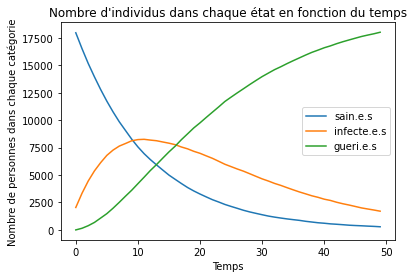

In [13]:
# T = 50
graphSIR(generated,50)

#### 2. Quand t est grand, quel est la proportion d’individus sains, infectés et guéris ?

In [14]:
def percentage(part, whole):
    """
    Fonction de pourcentage utilisé dans la fonction de proportion.
    *les parametres:
    part : 
    
    """
    return 100 * part/whole


In [15]:
def proportion(dic, t, whole):
    sains = percentage(dic[t-1]["S"],whole)
    infectes = percentage(dic[t-1]["I"],whole)
    gueris = percentage(dic[t-1]["R"],whole)
    print("Sains : ",sains, "% -- Infectés : ", infectes, "% -- Guéris : ", gueris, "%")

Pour T = 50 comme sur le sujet :

In [16]:
proportion(generated, 50, 20000)

Sains :  1.435 % -- Infectés :  8.535 % -- Guéris :  90.03 %


T est grand :
Nous prenons T = 500

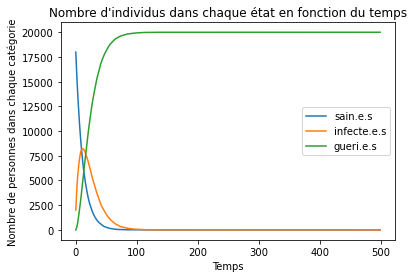

In [17]:
generatedTgrand = GenerateRandomPS(20000, 500, pi0, A)
graphSIR(generatedTgrand,500)

In [18]:
proportion(generatedTgrand, 500, 20000)

Sains :  0.0 % -- Infectés :  0.0 % -- Guéris :  100.0 %


### Pic de l’épidémie

#### Au pic de l’épidémie, combien d’individus sont infectés ? A quel temps se produit le pic ?

In [19]:
def dicPic(dic, t, state):
    # prend le dictionnaire et trouve le plus grand I avec son T correspondant 
    state_dic = {t:dic[t][state] for t in dic}
    max_value = max(state_dic.values())
    max_key = 0
    for key, value in state_dic.items():
        if max_value == value : 
            max_key = key
            break
    return {max_key : max_value}    

In [20]:
def pic(dic, t, state):

    max_infectes = dicPic(dic, t, state)
    cle = list(max_infectes.keys())
    valeur = list(max_infectes.values())
    temps = cle[0]
    nombre = valeur[0]
    print("Nombre d'invidus: ", nombre, "-- Le temps de production du pic : ", temps)

Nombre d'individus infectés et le temps du pic : 

In [21]:
pic(generated,50,"I")

Nombre d'invidus:  8253 -- Le temps de production du pic :  11


### Longueur de l’infection

#### 1. À partir des simulations, estimer la longueur moyenne d’une séquence de I

Moyenne pour un seul individu :

In [22]:
def moyenneInd(list_sequences, state):
    
    somme_seq = 0
    somme_list = 0
    
    for sequence in list_sequences: 
        somme_seq = sequence.count(state)
        somme_list += somme_seq
    
    return somme_list/len(list_sequences)


In [23]:
def generateManySequences(T, dist_proba_init, matrice_transition, number):

    list_seq = []
    for i in range(number):
        new_seq = generateRandomSequence(T, dist_proba_init, matrice_transition)
        list_seq.append(new_seq)
    return list_seq

In [24]:
listSq = generateManySequences(50, pi0, A, 100)
moyInd = moyenneInd(listSq, "I")
print("La longeur moyenne d'une séquence de I pour un individu est: ", moyInd)

La longeur moyenne d'une séquence de I pour un individu est:  11.74


Moyenne pour toute la population en fonction du temps : 

In [25]:
def moyennePop(dic, t, state):
    stateList = [dic[t][state] for t in dic]
    return sum(stateList)/len(stateList)

In [26]:
moyPop = moyennePop(generated,50,"I")
print("La longeur moyenne d'une séquence de I dans la population est: ", moyPop)

La longeur moyenne d'une séquence de I dans la population est:  5133.22


#### 2. Calculer théoriquement la longueur d’une séquence de I en fonction de la probabilité de rester infecté, si on est infecté au temps précédent (vous pourrez utiliser l’espérance de la loi géométrique)

## 2 Modèle ergodique

#### 1. Créez la nouvelle matrice de transition, et les nouvelles simulations, comment la population évoluet-elle si un individu guérit peut redevenir infecté ?

In [27]:
A1 = np.array([[0.92,0.08,0],[0,0.93,0.07],[0.04,0,0.96]])
print(A1)

[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.04 0.   0.96]]


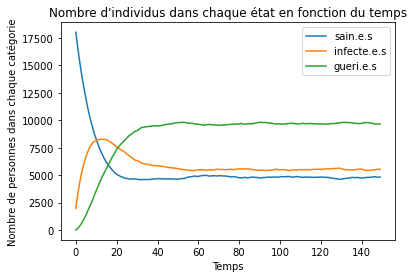

In [28]:
ergoDic = GenerateRandomPS(20000, 150, pi0, A1)
graphSIR(ergoDic, 150)

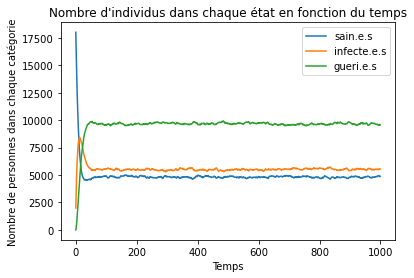

In [29]:
ergoDicGrand = GenerateRandomPS(20000, 1000, pi0, A1)
graphSIR(ergoDicGrand, 1000)

#### 2. Refaire les simulations avec une autre distribution de probabilité initiale, par exemple si au temps t = 0, nous avons 90% d’infectés et 10% de sains. Explorez d’autres initialisations et commentez vos observations.

In [30]:
pi0_new = [0.1, 0.9, 0]
print(pi0_new)

[0.1, 0.9, 0]


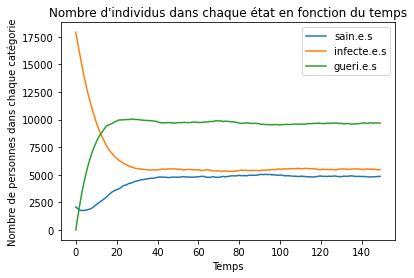

In [31]:
ergoDic_new = GenerateRandomPS(20000, 150, pi0_new, A1)
graphSIR(ergoDic_new, 150)

In [32]:
def randomInitialisations(number,pop,t):
    
    for i in range(number):    
        s = np.random.rand()
        i = np.random.rand()
        r = np.random.rand()
        pi0_random = [s, i, r]
        print ("Pour une distribution initial de ", s*100, "% sains, ", i*100, "% infectés et ", r*100, "% guéris")
        ergoDic_random = GenerateRandomPS(pop, t, pi0_random, A1)
        graphSIR(ergoDic_random, t)
        proportion(ergoDic_random, t, pop)
    

Pour une distribution initial de  35.78246372373529 % sains,  67.58349935259731 % infectés et  9.44862429494192 % guéris


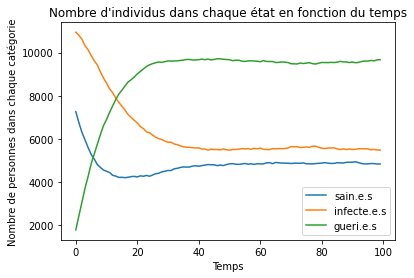

Sains :  24.215 % -- Infectés :  27.41 % -- Guéris :  48.375 %
Pour une distribution initial de  77.67806132071392 % sains,  10.750811301043218 % infectés et  90.2196877220709 % guéris


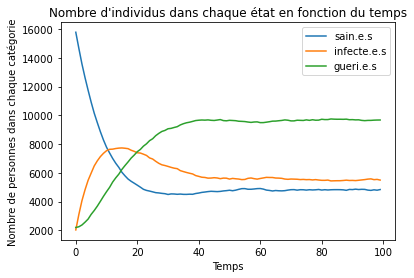

Sains :  24.16 % -- Infectés :  27.46 % -- Guéris :  48.38 %
Pour une distribution initial de  81.69941540777549 % sains,  82.17315084414139 % infectés et  24.07645931946415 % guéris


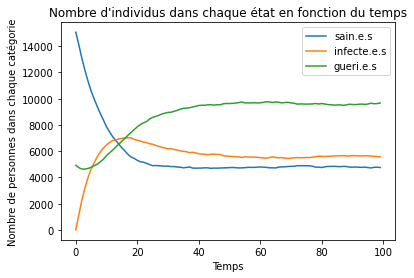

Sains :  23.785 % -- Infectés :  27.845 % -- Guéris :  48.37 %
Pour une distribution initial de  30.889624054119345 % sains,  91.16911066699018 % infectés et  4.1096621011402545 % guéris


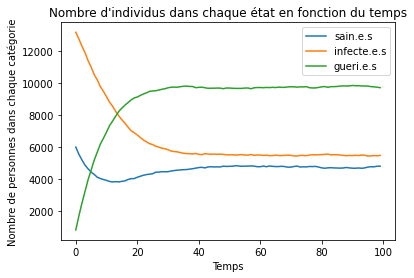

Sains :  24.02 % -- Infectés :  27.405 % -- Guéris :  48.575 %
Pour une distribution initial de  23.661488712777857 % sains,  33.780183779829834 % infectés et  62.23856175878285 % guéris


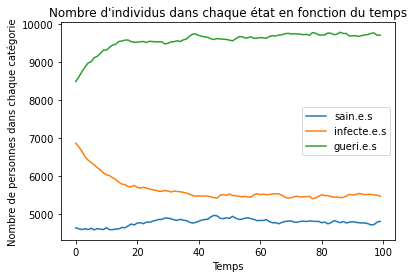

Sains :  24.075 % -- Infectés :  27.385 % -- Guéris :  48.54 %


In [33]:
randomInitialisations(5,20000,100)

Nous pouvons toujours constater que les courbes se convergent vers les meme valeurs constantes meme si les distributions changent.

#### 3. Quels est la nature des états de cette chaine de Markov ? Est-elle périodique ? Est-elle irréductible ?

Une chaine de Markov est ergodique si et seulement si elle est irréductible,
apériodique et récurente positive.

#### 4. Calculer la distribution de probabilité stationnaire à partir de la matrice de transition et comparez ce résultat avec les simulations pour t assez grand.


## 3 Modification du modèle : confinement

#### 1. Comment l’épidémie évolue-t-elle si vous modifiez la probabilité pour un individu sain de devenir infecté ? Modifiez le premier modèle pour créer une nouvelle matrice des probabilités de transitions A2, et comparer les simulations au premier modèle.

In [34]:
A2 = np.array([[0.98,0.02,0],[0,0.93,0.07],[0,0,1]])
print(A2)

[[0.98 0.02 0.  ]
 [0.   0.93 0.07]
 [0.   0.   1.  ]]


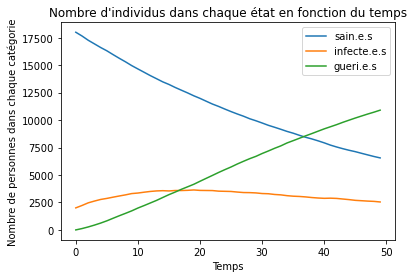

In [35]:
confinementDic = GenerateRandomPS(20000, 50, pi0, A2)
graphSIR(confinementDic, 50)

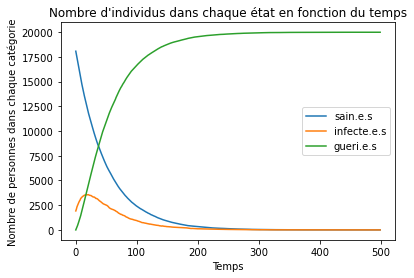

In [36]:
confinementDicGrand = GenerateRandomPS(20000, 500, pi0, A2)
graphSIR(confinementDicGrand, 500)

#### 2. Maintenant nous allons alterner entre les périodes de non distanciation et de distanciation.

In [37]:
pi0_conf = [1, 0, 0]

In [53]:
# boucle fel length ta random sequence baadika imbriqué feha boucle mtaa population 
# w ala kol 3abd te5ou state barka w t7otou fel blasa te3ha w tlanci el pourcentage w tshouf bel conditions

def confinement(population, t, dist_proba_init, matrice_transition_conf, matrice_transition_deconf):
    
    
    indiv = dict()
    for ind in range(population):
        indiv = {ind : 0}
    
    SIR = {0 : "S", 1 : "I", 2 : "R"}
    random_sequence = ""
    states = dict()  
    for i in range(t): 
        states[i] = {"S":0, "I":0, "R":0} 
       
    for individu in range(population):
        proba = np.random.randint(0,100)
        while proba == 0 : 
            proba = np.random.randint(0,100)
        i = initialStatePicker(proba,dist_proba_init)
        indiv[individu] = i
        statecase = SIR.get(i)
        if statecase == "S": 
            states[0]["S"] += 1 
        elif statecase == "I": 
            states[0]["I"] += 1 
        elif statecase == "R":
            states[0]["R"] += 1 
        
    
    confinement = False
    
    
    for etat_i in range(1,t): 
        
        I = [states[x]["I"] for x in states]
        perc = percentage(states[etat_i - 1]["I"],population)
        
        for individu in range(population):
            
            if (perc >= 30) or ((perc >= 15) and (confinement)):
                confinement = True
                proba = np.random.randint(0,100)
                while (proba == 0) : 
                    proba = np.random.randint(0,100)

                i = nextStatePicker(indiv[individu],proba,matrice_transition_conf)
                indiv[individu] = i
                
                
                          
            elif (perc < 15) and (confinement):
                confinement = False
                proba = np.random.randint(0,100)
                while (proba == 0) : 
                    proba = np.random.randint(0,100)

                i = nextStatePicker(indiv[individu],proba,matrice_transition_deconf)
                indiv[individu] = i 
            
            else:
                proba = np.random.randint(0,100)
                while (proba == 0) : 
                    proba = np.random.randint(0,100)

                i = nextStatePicker(indiv[individu],proba,matrice_transition_deconf)
                indiv[individu] = i 
    
            statecase = SIR.get(i)
            if statecase == "S": 
                states[etat_i]["S"] += 1 
            elif statecase == "I": 
                states[etat_i]["I"] += 1 
            elif statecase == "R":
                states[etat_i]["R"] += 1
                
    return states

In [54]:
confDic = confinement(20000, 150, pi0_conf, A2, A)


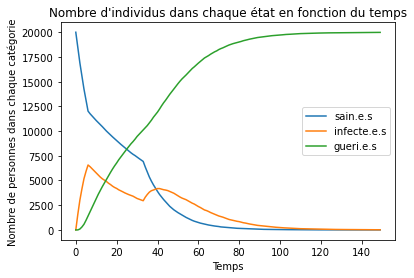

In [55]:
graphSIR(confDic, 150)